Material selected from:
* https://github.com/jakevdp/sklearn_scipy2013
* 

In [1]:
import numpy as np # for numerical operations
import sklearn.datasets as datasets # the datasets
import sklearn.model_selection as modsel # training utilities
import sklearn.metrics as metrics # evaluation
import matplotlib.pyplot as plt

In [2]:
import pylab as pl # utilities

In [3]:
%matplotlib inline

# Supervised Learning: Classification of Handwritten Digits

In [4]:
digits = datasets.load_digits()

## Explore the dataset

In [5]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

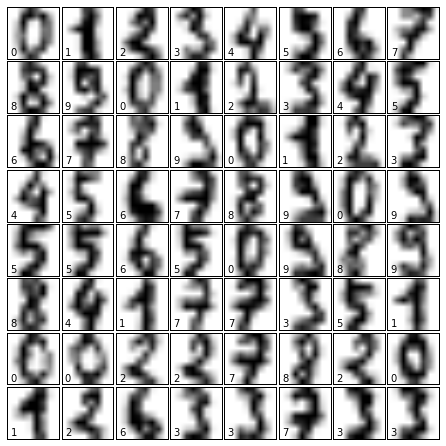

In [6]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Learn with (Gaussian) Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = modsel.train_test_split(digits.data, digits.target)

In [9]:
# train the model
our_model = GaussianNB()
our_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [10]:
# use the model to predict the labels of the test data
predicted = our_model.predict(X_test)
correct = y_test

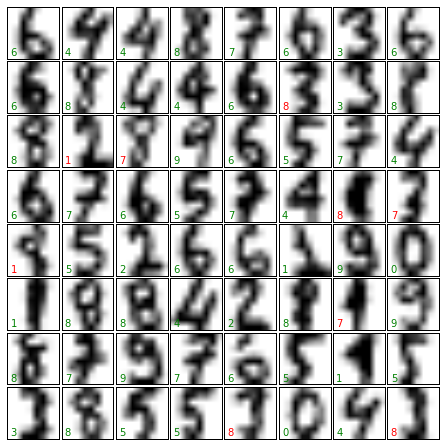

In [11]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    if predicted[i] == correct[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [12]:
nb_matches = (predicted == correct)
right = nb_matches.sum()
total = len(nb_matches)
nb_precision_pct = 100 * right / total

print('Naive Bayes is correct {:.3}% of the time'.format(nb_precision_pct))

Naive Bayes is correct 81.6% of the time


In [13]:
print(metrics.confusion_matrix(correct, predicted, labels = digits.target_names))

[[35  0  0  0  1  0  0  0  0  0]
 [ 0 31  1  0  0  0  1  3  8  1]
 [ 0  6 26  0  0  1  1  0 14  0]
 [ 0  0  0 20  0  1  0  1 17  1]
 [ 0  1  0  0 43  0  0  3  0  0]
 [ 0  0  0  0  0 39  0  2  0  0]
 [ 0  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  1  0  0 42  0  0]
 [ 0  2  2  0  0  1  0  2 40  0]
 [ 0  2  0  0  1  0  1  3  5 34]]


# Learn with SVM

In [14]:
import sklearn.svm as svm

In [15]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
svm_predicted = svm_model.predict(X_test)

In [17]:
svm_matches = (svm_predicted == correct)
right = svm_matches.sum()
total = len(svm_matches)
svm_precision_pct = 100 * right / total

print('SVM is correct {:.3}% of the time'.format(svm_precision_pct))

SVM is correct 47.3% of the time


## Learn with Random Forests

In [18]:
import sklearn.ensemble as ensemble

In [19]:
rf_model = ensemble.RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
rf_predicted = rf_model.predict(X_test)

In [21]:
rf_matches = (rf_predicted == correct)
right = rf_matches.sum()
total = len(rf_matches)
rf_precision_pct = 100 * right / total

print('Random Forests is correct {:.3}% of the time'.format(rf_precision_pct))

Random Forests is correct 94.2% of the time


# Supervised Learning: Regression of Housing Data

In [22]:
boston = datasets.load_boston()

## Explore the dataset

In [23]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [24]:
print(boston.keys())

dict_keys(['data', 'feature_names', 'DESCR', 'target'])


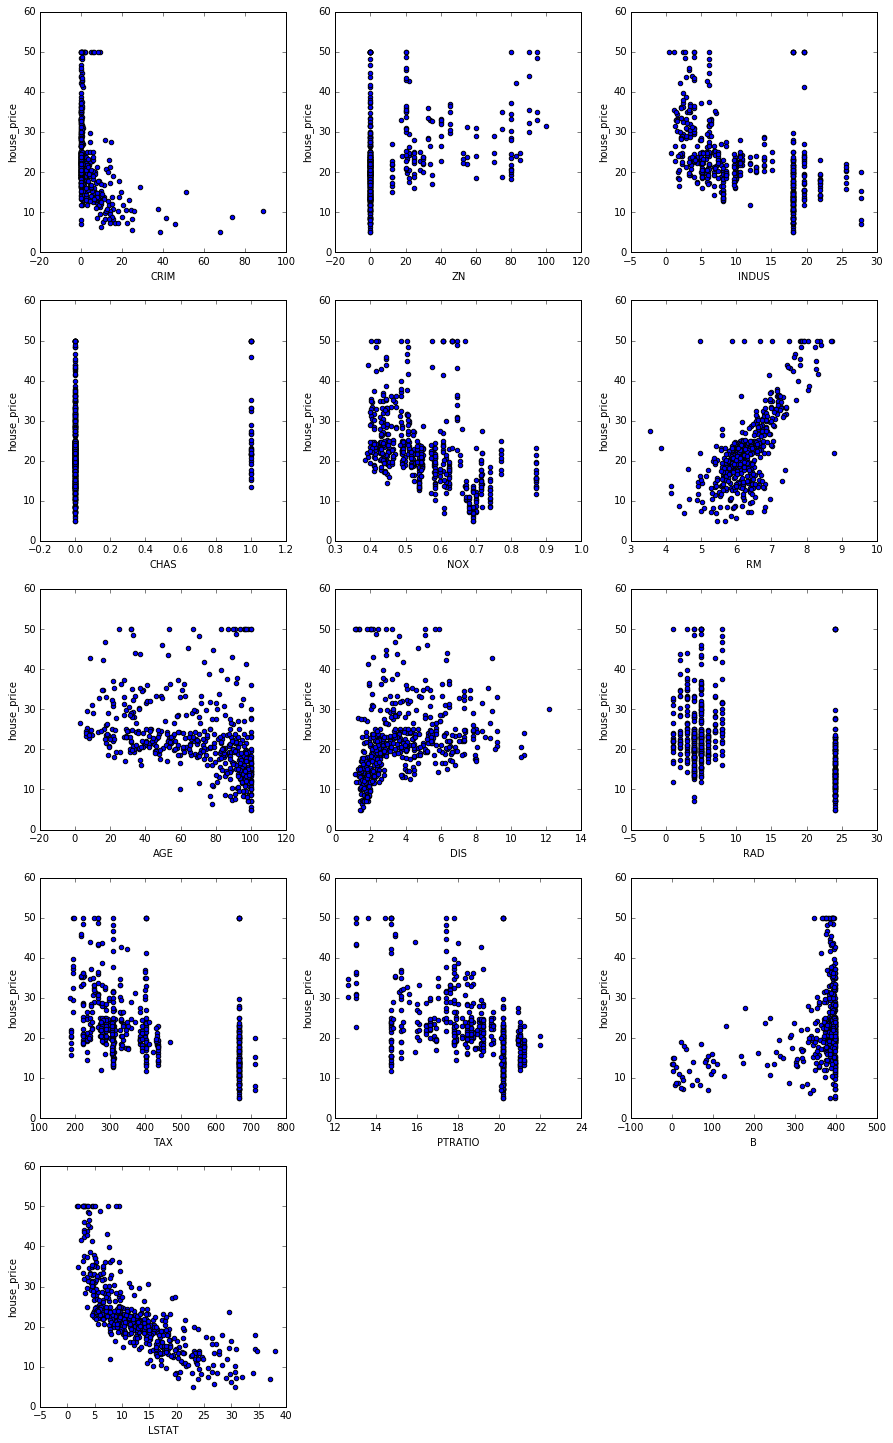

In [25]:
nn = len(boston.feature_names)
num_columns = 3
num_rows = int(np.ceil(nn/num_columns))
fig, ax = plt.subplots(num_rows,num_columns,figsize = (num_columns * 5, num_rows*5))
for ii in range(nn):
    x_values = boston.data[:,ii]
    y_values = boston.target
    feat_name = boston.feature_names[ii]
    
    ax[ii//num_columns, ii%num_columns].set(xlabel = feat_name, ylabel = 'house_price')
    ax[ii//num_columns, ii%num_columns].scatter(x_values, y_values)

for ii in range(nn, num_columns*num_rows):
    ax[ii//num_columns, ii%num_columns].axis('off')



## Learn with linear regression

In [26]:
import sklearn.linear_model as linear_model

In [27]:
X_train, X_test, y_train, y_test = modsel.train_test_split(boston.data, boston.target)

In [28]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train);

In [29]:
lr_predicted = lr_model.predict(X_test)
correct = y_test

Standard Error: 4.03601363585


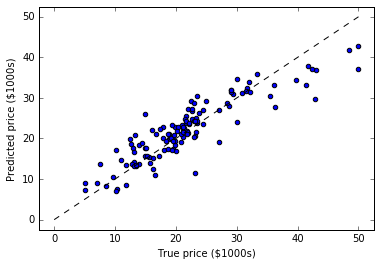

In [30]:
predicted = lr_predicted
plt.scatter(correct, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print ("Standard Error:", np.sqrt(np.mean((predicted - correct) ** 2)))

## Learn with Ridge Regression

In [31]:
rr_model = linear_model.RidgeCV()
rr_model.fit(X_train, y_train);

In [32]:
rr_predicted = rr_model.predict(X_test)

Standard Error: 4.0301407294


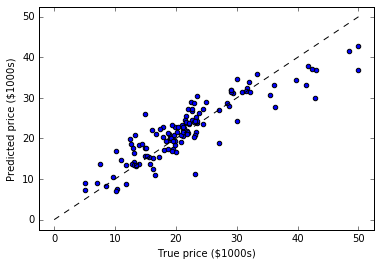

In [33]:
predicted = rr_predicted
plt.scatter(correct, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print ("Standard Error:", np.sqrt(np.mean((predicted - correct) ** 2)))

## Learn with Lasso

In [34]:
lasso_model = linear_model.LassoCV()
lasso_model.fit(X_train, y_train);

In [35]:
lasso_predicted = lasso_model.predict(X_test)

Standard Error: 4.23893122595


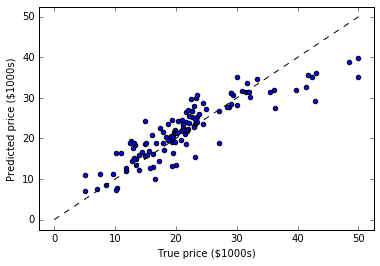

In [36]:
predicted = lasso_predicted
plt.scatter(correct, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print ("Standard Error:", np.sqrt(np.mean((predicted - correct) ** 2)))

### Exercise: Regularization for Ridge Regression and Lasso

Explore the effect of the regularization parameter `alpha` on the performance of `linear_model.Lasso` and `linear_model.Ridge`.

Compare the behavior of training and test error.

## Learn with Random Forest

In [37]:
rf_model = ensemble.RandomForestRegressor()
rf_model.fit(X_train, y_train);

In [38]:
rf_predicted = rf_model.predict(X_test)

Standard Error: 3.51549651515


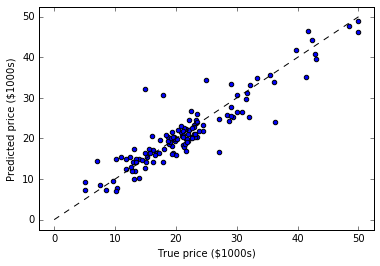

In [39]:
predicted = rf_predicted
plt.scatter(correct, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print ("Standard Error:", np.sqrt(np.mean((predicted - correct) ** 2)))

# Random Forests Demo

In [40]:
# Create our own data
rng = np.random.RandomState(0)
N = 100
X = np.linspace(0, 6, N)[:, np.newaxis]
error = 0.4
y_true = np.sin(X).ravel() + np.sin(6 * X).ravel()
y_noisy = y_true + rng.normal(0, error, X.shape[0])

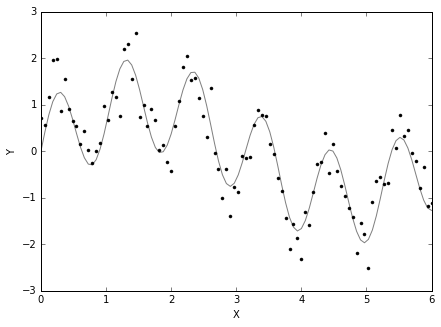

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ax.set(xlabel = 'X', ylabel = 'Y')
ax.plot(X.ravel(), y_true, color='gray');
ax.plot(X.ravel(), y_noisy, '.k');

In [42]:
import sklearn.tree as tree_models

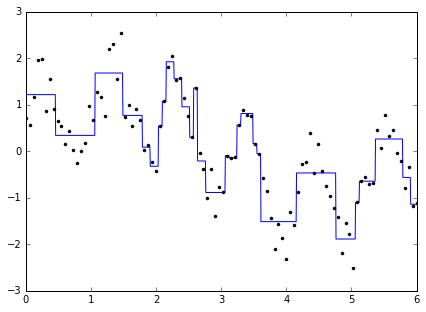

In [43]:
clf = tree_models.DecisionTreeRegressor(max_depth=5)
clf.fit(X, y_noisy)

X_fit = np.linspace(0, 6, 1000).reshape((-1, 1))
y_fit_1 = clf.predict(X_fit)

fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(X_fit.ravel(), y_fit_1, color='blue');
ax.plot(X.ravel(), y_noisy, '.k');

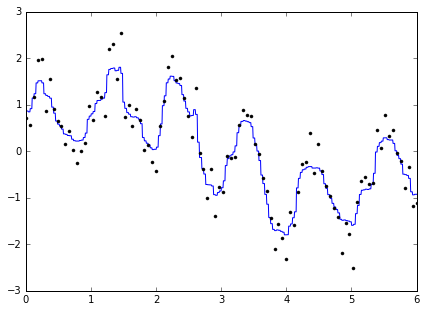

In [44]:
clf = ensemble.RandomForestRegressor(n_estimators=200, max_depth=5)
clf.fit(X, y_noisy)

y_fit_200 = clf.predict(X_fit)

fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(X_fit.ravel(), y_fit_200, color='blue');
ax.plot(X.ravel(), y_noisy, '.k');

### Selecting optimal parameters

In [45]:
# Shuffle the data before grid search
i = np.random.permutation(X.shape[0])
X = X[i]
y_noisy = y_noisy[i]

rf = ensemble.RandomForestRegressor()
parameters = {'n_estimators':[200, 300, 400],
              'max_depth':[5, 7, 9]}

# Warning: be sure your data is shuffled before using GridSearch!
clf_grid = modsel.GridSearchCV(rf, parameters)
clf_grid.fit(X, y_noisy)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 7, 9], 'n_estimators': [200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Best performance for 200 estimators, depth 9


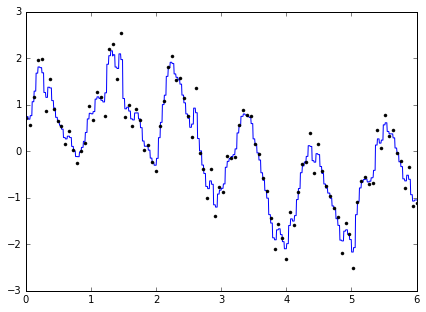

In [46]:
rf_best = clf_grid.best_estimator_
X_fit = np.linspace(0, 6, 1000).reshape((-1, 1))
y_fit_best = rf_best.predict(X_fit)

print ("Best performance for {} estimators, depth {}"\
       .format(rf_best.n_estimators, rf_best.max_depth))

fig, ax = plt.subplots(figsize = (7,5))
ax.plot(X_fit.ravel(), y_fit_best, color='blue');
ax.plot(X.ravel(), y_noisy, '.k');

# SVM demo

In [47]:
import sklearn.svm as svm

In [48]:
# prepare visualization

from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.axis('tight')
    pl.axis('off')
    pl.tight_layout()

In [49]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X, y = X[np.in1d(y, [1, 2])], y[np.in1d(y, [1, 2])]

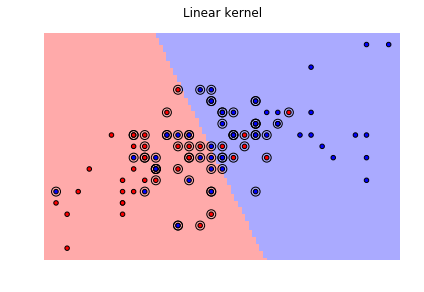

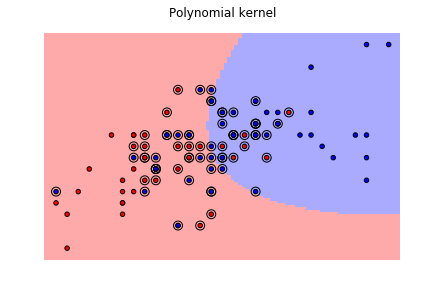

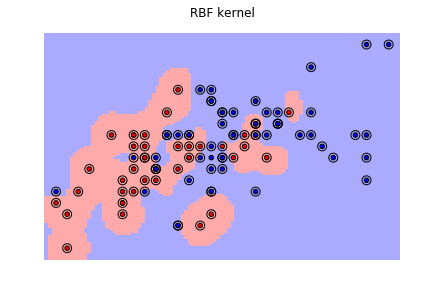

In [50]:
svc = svm.SVC(kernel='linear')
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('Linear kernel')

svc = svm.SVC(kernel='poly', degree=4)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('Polynomial kernel')

svc = svm.SVC(kernel='rbf', gamma=1e2)
plot_estimator(svc, X, y)
pl.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
pl.title('RBF kernel')